# Classificação do conjunto de dados Íris

### Definição do Problema

O conjunto de dados contém três classes com 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris. As classes são linearmente separáveis umas das outras.

Atributo de predição: classe de planta de íris.



### Importação das bibliotecas

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

### Carregando e definindo as colunas do dataset

In [3]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento',
           'petal_largura','tipo']
data = pd.read_csv('iris-dataset.csv',names=columns)

### Visualização e descrição dos dados

In [4]:
data.head(10)

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
data.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 5)

In [7]:
data.groupby('tipo').size()

tipo
setosa        50
versicolor    50
virginica     50
dtype: int64

In [8]:
data['tipo'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: tipo, dtype: int64

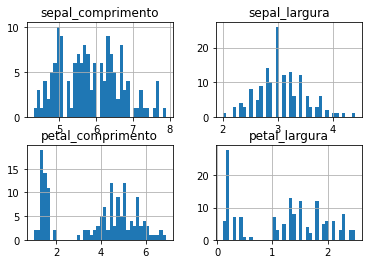

In [9]:
data.hist(bins=40);

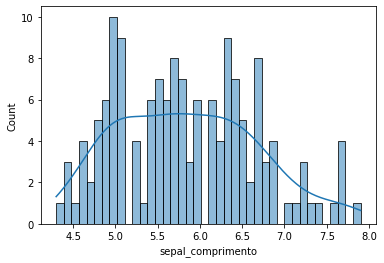

In [103]:
sns.histplot(data['sepal_comprimento'], bins=40, kde=True);

In [8]:
data.corr()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
sepal_comprimento,1.000000,-0.109369,0.871754,0.817954
sepal_largura,-0.109369,1.000000,-0.420516,-0.356544
petal_comprimento,0.871754,-0.420516,1.000000,0.962757
petal_largura,0.817954,-0.356544,0.962757,1.000000


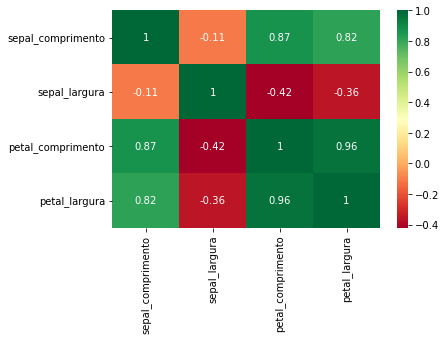

In [113]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn');

### Criação do dataset de validação

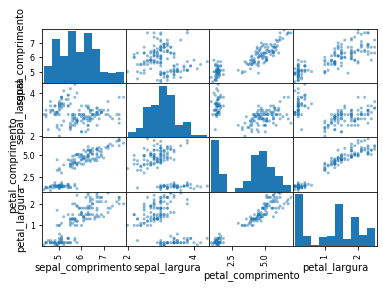

In [15]:
scatter_matrix(data);

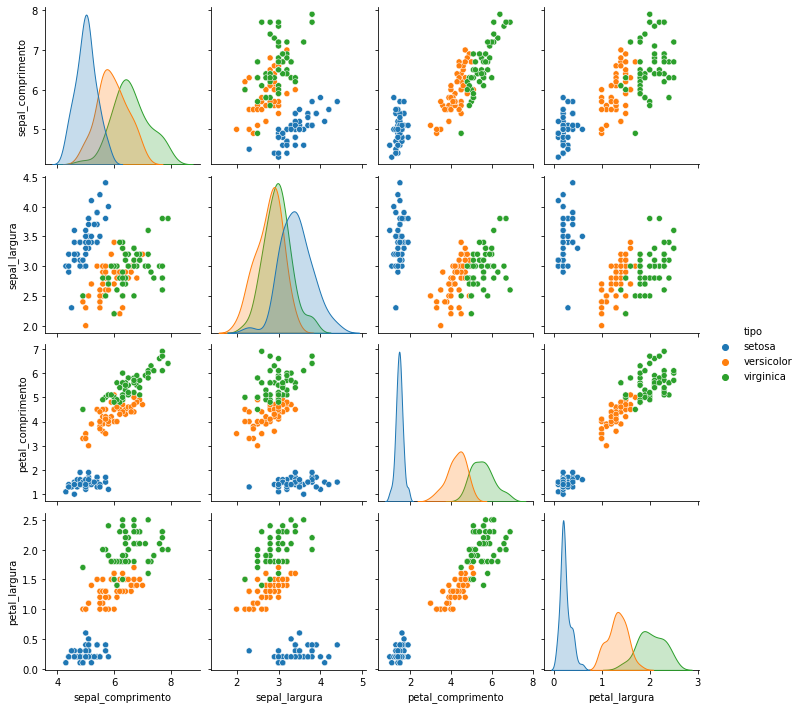

In [106]:
sns.pairplot(data, hue='tipo');

In [11]:
pd.factorize(data['tipo'])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

In [10]:
tipos_num = pd.factorize(data['tipo'])[0]
tipos_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

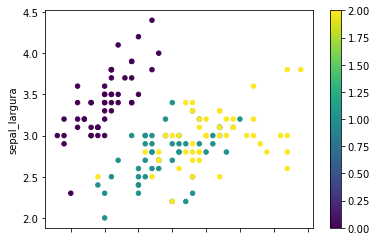

In [84]:
data.plot.scatter(x='sepal_comprimento', y='sepal_largura', c=tipos_num, cmap='viridis');

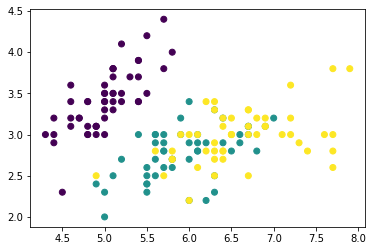

In [82]:
plt.scatter(data['sepal_comprimento'], data['sepal_largura'], c=tipos_num);

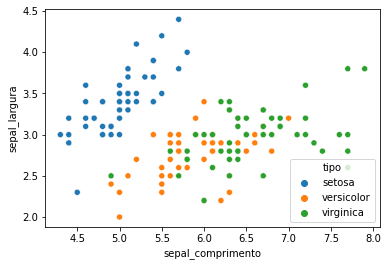

In [117]:
sns.scatterplot(x=data['sepal_comprimento'], y=data['sepal_largura'], hue=data['tipo']);

In [14]:
dataset = data.values
dataset

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [15]:
np.random.seed(1)
np.random.shuffle(dataset)

In [16]:
dataset

array([[5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.1, 2.5, 3.0, 1.1, 'versicolor'],
       [6.6, 3.0, 4.4, 1.4, 'versicolor'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [7.9, 3.8, 6.4, 2.0, 'virginica'],
       [6.3, 3.3, 4.7, 1.6, 'versicolor'],
       [6.9, 3.1, 5.1, 2.3, 'virginica'],
       [5.1, 3.8, 1.9, 0.4, 'setosa'],
       [4.7, 3.2, 1.6, 0.2, 'setosa'],
       [6.9, 3.2, 5.7, 2.3, 'virginica'],
       [5.6, 2.7, 4.2, 1.3, 'versicolor'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [7.1, 3.0, 5.9, 2.1, 'virginica'],
       [6.4, 3.2, 4.5, 1.5, 'versicolor'],
       [6.0, 2.9, 4.5, 1.5, 'versicolor'],
       [4.4, 3.2, 1.3, 0.2, 'setosa'],
       [5.8, 2.6, 4.0, 1.2, 'versicolor'],
       [5.6, 3.0, 4.5, 1.5, 'versicolor'],
       [5.4, 3.4, 1.5, 0.4, 'setosa'],
       [5.0, 3.2, 1.2, 0.2, 'setosa'],
       [5.5, 2.6, 4.4, 1.2, 'versicolor'],
       [5.4, 3.0, 4.5, 1.5, 'versicolor'],
       [6.7, 3.0, 5.0, 1.7, 'versicolor'],
       [5.0, 3.5, 1.3, 0.3, 'setosa'],
       [

In [17]:
X = dataset[:,:4]
y = dataset[:,4]

In [18]:
n_train = int(round(len(y) * 0.75))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

In [19]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 4), (150,), (112, 4), (112,), (38, 4), (38,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [20]:
modelos = {}

In [21]:
modelos['DT'] = tree.DecisionTreeClassifier()
modelos['SVM'] = svm.SVC()
modelos['KNN'] = neighbors.KNeighborsClassifier()
modelos['LogReg'] = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg')
modelos['NB'] = naive_bayes.GaussianNB()
modelos['SGD'] = linear_model.SGDClassifier()
modelos['RF'] = ensemble.RandomForestClassifier()
modelos['GB'] = ensemble.GradientBoostingClassifier()

### Resultados

In [32]:
algs = []
resultados_train = []
resultados_test = []
for modelo_str in modelos.keys():
    modelo = modelos[modelo_str]
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    acuracia_train = metrics.accuracy_score(y_train, y_pred_train)
    acuracia_test = metrics.accuracy_score(y_test, y_pred_test)
    algs.append(modelo_str)
    resultados_train.append(round(acuracia_train, 2))
    resultados_test.append(round(acuracia_test, 2))
df_result = pd.DataFrame({'algs': algs, 'acc_train': resultados_train, 'acc_test': resultados_test })
df_result

,algs,acc_train,acc_test
0,DT,1.00,0.87
1,SVM,0.96,0.95
2,KNN,0.99,0.92
3,LogReg,0.97,0.92
4,NB,0.98,0.89
5,SGD,0.98,0.89
6,RF,1.00,0.87
7,GB,1.00,0.87


In [34]:
df_result.sort_values('acc_test', ascending=False)

,algs,acc_train,acc_test
1,SVM,0.96,0.95
2,KNN,0.99,0.92
3,LogReg,0.97,0.92
4,NB,0.98,0.89
5,SGD,0.98,0.89
0,DT,1.00,0.87
6,RF,1.00,0.87
7,GB,1.00,0.87


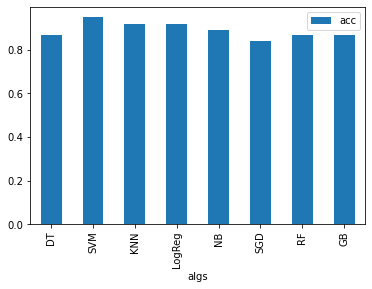

In [30]:
df_result.plot(x='algs', y='acc', kind='bar');

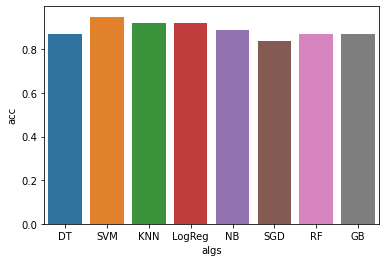

In [31]:
sns.barplot(x=df_result['algs'], y=df_result['acc']);